In [3]:
import pandas as pd
# read the dataset
df = pd.read_csv('/Users/mosesgrey/Machine Learning (Lesson Assignment)/diabetes2.csv')


In [4]:
df


,preg,plas,pres,skin,insu,mass,pedi,age,tested_negative
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,0
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1
764,2,122,70,27,0,36.8,0.340,27,1
765,5,121,72,23,112,26.2,0.245,30,1
766,1,126,60,0,0,30.1,0.349,47,0


In [23]:
# Split into features and target variable
X = df.iloc[:, :8]
y = df.iloc[:, 8]

In [6]:
X = df.drop(['tested_negative'], axis=1)


In [7]:
y = df.iloc[:,-1]


In [9]:
y = df['tested_negative']


In [20]:
# Preprocess the input features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [24]:
# Split the preprocessed data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [25]:
# Train a linear regression model on the training data

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [36]:
# Evaluate the model on the training and testing data
lr_train_preds = lr.predict(X_train)
lr_train_mse = mean_squared_error(y_train, lr_train_preds)
lr_train_r2 = r2_score(y_train, lr_train_preds)

lr_test_preds = lr.predict(X_test)
lr_test_mse = mean_squared_error(y_test, lr_test_preds)
lr_test_r2 = r2_score(y_test, lr_test_preds)

# Print the results
print(f'Train MSE: {lr_train_mse:.2f}')
print(f'Train R^2: {lr_train_r2:.2f}')
print(f'Test MSE: {lr_test_mse:.2f}')
print(f'Test R^2: {lr_test_r2:.2f}')

Train MSE: 0.16
Train R^2: 0.31
Test MSE: 0.17
Test R^2: 0.26


In [39]:
lr_results = pd.DataFrame([['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]], 
                          columns=['model', 'train_mse', 'train_r2', 'test_mse', 'test_r2'])


In [38]:
print(lr_train_mse)


0.15744485172625472


In [40]:
lr_results = pd.DataFrame(['Linear regression',lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=42)

In [42]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)


In [43]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [44]:
rf_results = pd.DataFrame(['Random forest',rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

In [45]:
from sklearn.tree import ExtraTreeRegressor
et = ExtraTreeRegressor(random_state=42)
et.fit(X_train, y_train)

ExtraTreeRegressor(random_state=42)

In [46]:
pd.concat([lr_results, rf_results])


,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.157445,0.30507,0.171045,0.255003
0,Random forest,0.153025,0.324579,0.165933,0.277268


Text(0.5, 0, 'Experimental tested_negative')

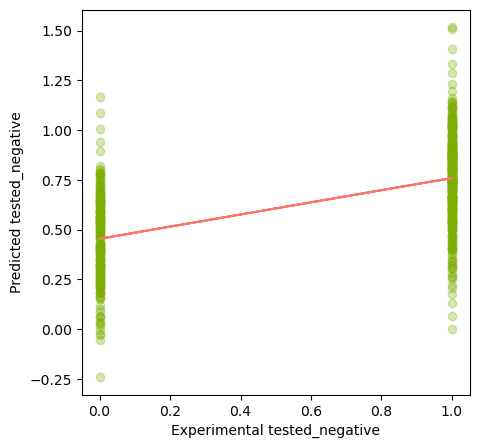

In [49]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00", alpha=0.3)
z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train,p(y_train),"#F8766D")
plt.ylabel('Predicted tested_negative')
plt.xlabel('Experimental tested_negative')
